In [ ]:
# Mount drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# **1- Preprocessing**
There are few steps perfomed during the pre-processing. 

*   Import all required libraries
*   Upload the dataset
*   Dataframe Pre-processing
*   Text Processing

In [ ]:
# import required libraries 

import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Dataframe Pre-processing
# Splits review rating into different classes, say positive(2), neutral(1) and negative(0). 

def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1 
    return 0

In [ ]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'rank', 'main_cat' ],axis=1)
  
  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df

In [ ]:
# Text Processing
# Removes all the punctuations for the strings of reviewText, i.e. '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [ ]:
# Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity

def text_process(df):
  
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english") 
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [ ]:
# Main Process 

def process_df(df):
  df = clean_dataframe(df)
  df = text_process(df)
  return df

In [ ]:
#dataset links source and destination

URL_UNCLEAN = "/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k.csv"
URL_CLEAN = "/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k_cleaned.csv"

In [ ]:
# Reading dataset and writing cleaned version on the required directory 

def main(URL_CLEAN=URL_CLEAN, URL_UNCLEAN=URL_UNCLEAN):
  df_unclean = pd.read_csv(URL_UNCLEAN)
  print("UNCLEANED DATASET HEAD:\n",df_unclean.head())

  df_clean = process_df(df_unclean)
  print("CLEANED DATASET HEAD:\n",df_clean.head())

  # Writing to dataframe
  df_clean.to_csv(URL_CLEAN)

In [ ]:
main()

UNCLEANED DATASET HEAD:
    Unnamed: 0  overall  verified        asin  \
0     4359171      5.0      True  B002TLT10I   
1     3938786      5.0      True  B001UQ6E3K   
2     6176764      5.0      True  B005FYNSUA   
3     1546547      5.0      True  B0007ZFLYI   
4     3178737      5.0      True  B0016JMS90   

                                           style      reviewerName  \
0  {'Product Packaging:': ' Standard Packaging'}   Catherine Hynes   
1                        {'Style:': ' 20-60x60'}         rschoepke   
2                        {'Capacity:': ' 16 GB'}              Carl   
3                                            NaN  Scott W. Soyster   
4                                            NaN            Dancer   

                                          reviewText  \
0  Love these things.  The supplied batteries wer...   
1            great value, good range and easy to use   
2    Smallest thumb drive ever! Can't beat the price   
3  I bought this webcam mostly because of

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k.csv")
data.head()

,Unnamed: 0,overall,verified,asin,style,reviewerName,reviewText,summary,description,title,rank,main_cat
0,4359171,5.0,True,B002TLT10I,{'Product Packaging:': ' Standard Packaging'},Catherine Hynes,Love these things. The supplied batteries wer...,Good headset Replaced batteries,"[""Wireless headphones come in many shapes and ...",Sennheiser RS 170 Digital Wireless Headphones ...,"['>#132,147 in Cell Phones & Accessories (See ...",Home Audio & Theater
1,3938786,5.0,True,B001UQ6E3K,{'Style:': ' 20-60x60'},rschoepke,"great value, good range and easy to use",Five Stars,['The 60 mm Waterproof UpClose Spotting Scope ...,Celestron 52229 60mm Refractor Zoom Spotting S...,"['>#20,943 in Camera & Photo (See Top 100 in C...",Camera & Photo
2,6176764,5.0,True,B005FYNSUA,{'Capacity:': ' 16 GB'},Carl,Smallest thumb drive ever! Can't beat the price,Five Stars,"[""With its low-profile design, the Cruzer Fit ...",SanDisk Cruzer Fit 8GB USB 2.0 Low-Profile Fla...,['>#326 in Computers & Accessories > Data Stor...,All Electronics
3,1546547,5.0,True,B0007ZFLYI,NaN,Scott W. Soyster,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,"[""When you rely on your notebook PC to communi...",Logitech Quickcam for Notebooks Deluxe,"['>#1,108 in Electronics &gt; Accessories &amp...",All Electronics
4,3178737,5.0,True,B0016JMS90,NaN,Dancer,I got this for my mom. She's not the most tec...,Good webcam,"['PC Webcam with Built-In Microphone', 'Add tr...",Logitech QuickCam Communicate MP (Black),['>#381 in Electronics > Accessories & Supplie...,All Electronics


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k_cleaned.csv")
data.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...


# **2- Exploratory Data Analysis (EDA)**
Analysis on the dataset performed and display data insights

In [ ]:
# Import the cleaned dataset 

URL = "/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k_cleaned.csv"

In [ ]:
# Importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

In [ ]:
# Read dataset
df = pd.read_csv(URL)

In [ ]:
# Change the overall category to categorical from numerical for easier visualization

df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

Visualization of the data 

*Distribution of sentiment classes across the dataset*

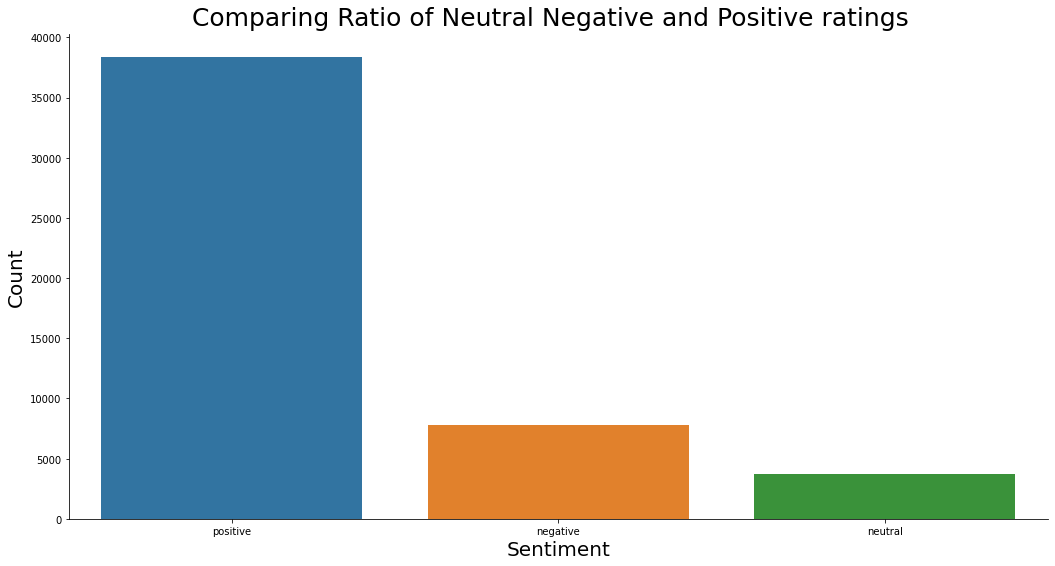

In [ ]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [ ]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 7.456439014620468 %
Percentage of negative words in train --> 15.681954736631285 %
Percentage of positive words in train --> 76.86160624874825 %


*Words and word clouds*

In [ ]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

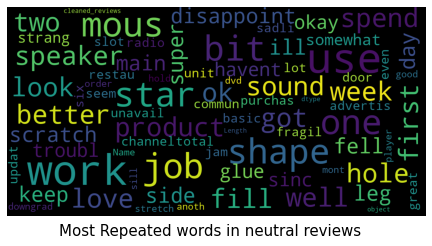

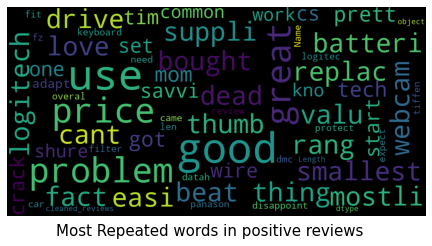

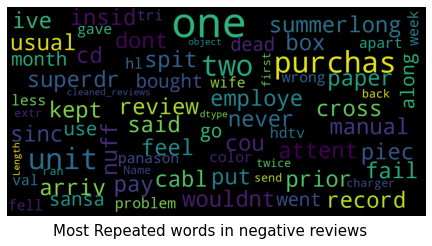

In [ ]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

*Most popular words in the dataset*

In [ ]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


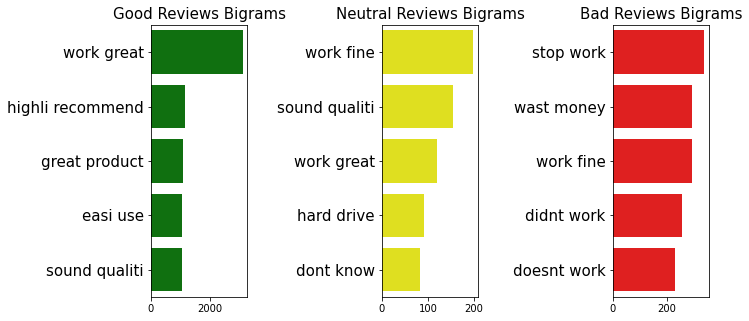

In [ ]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# Bigram plot using function above
plt.figure(figsize=(10,5))
# Good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#Neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')
#============================================= 
#Bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

*Sentiment distibutions*

In [ ]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews,classes,sentiment
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac,positive,0.150000
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use,positive,0.750000
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price,positive,0.000000
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...,positive,0.155790
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...,positive,0.372619


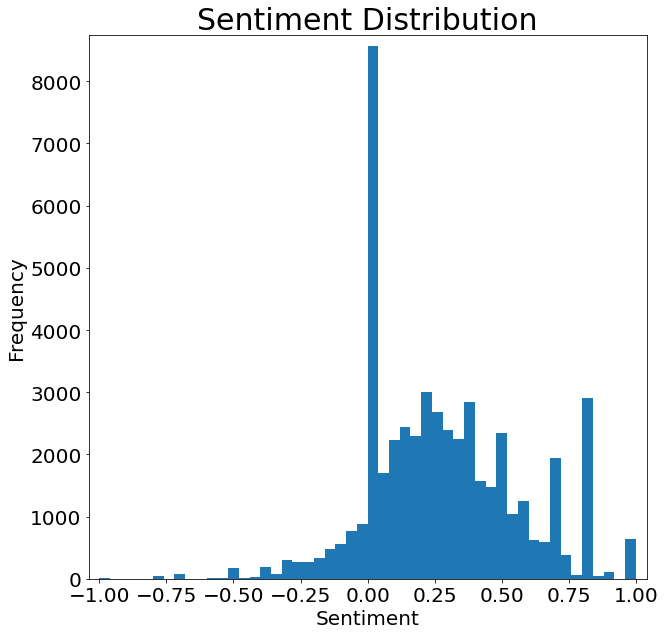

In [ ]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(10,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

*Correlation heatmap to analyse the dependence between review length and sentiment*

It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sentiment indicating negative reviews tend to be longer than positive or neutral ones.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


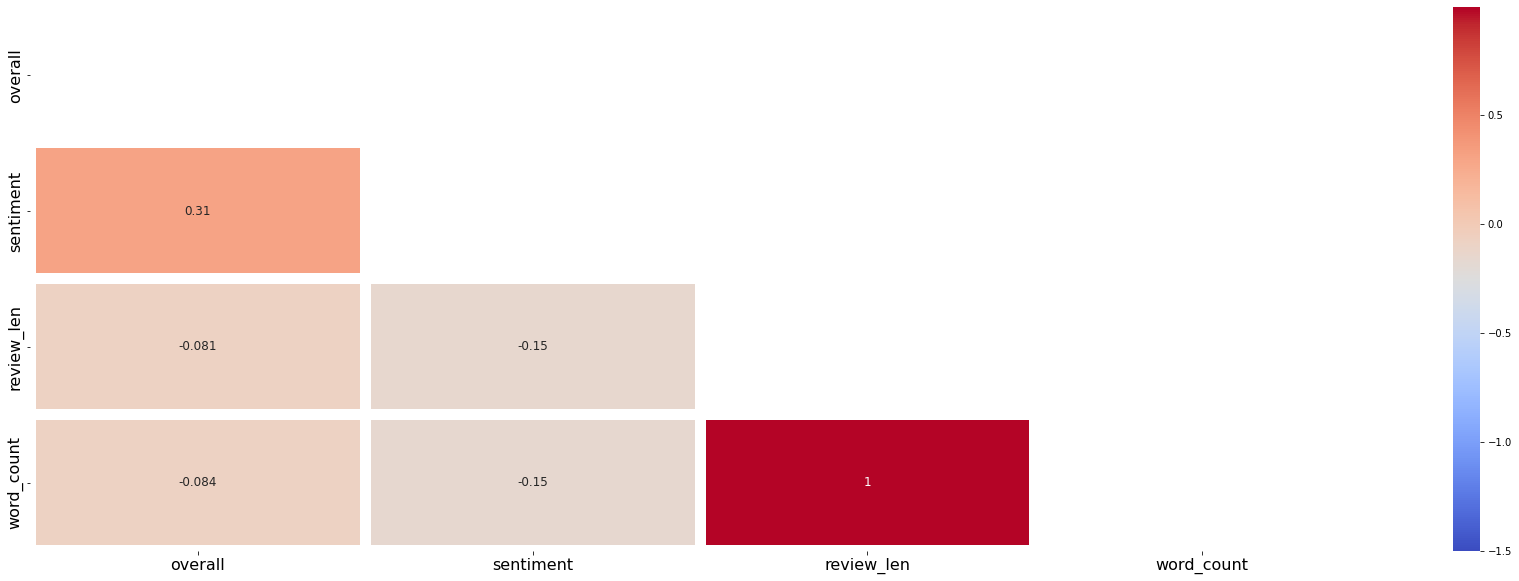

In [ ]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

# **3- Models**
Different Machine Learning algorithms used to develop the model

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

#Libraries to implement Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

#Pre-processing and NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import re
import string

#Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
URL = "/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k_cleaned.csv"

In [ ]:
#Reading the dataset
df = pd.DataFrame(pd.read_csv(URL))
#Dropping Nan value rows pertaining to the Reviews
df = df.dropna(axis=0,subset=['cleaned_reviews'])

In [ ]:
#Displaying dataset sample for sake of clarity and readability
df.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...


In [ ]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))

#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [ ]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
#text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier3 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])
text_clf_classifier5 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001)),])
text_clf_classifier6 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001,loss='log')),])

In [ ]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

Random Forest Classifier Paramteres tuned ->

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*Cost complexity pruning paramter - 0.0(No pruning)

In [ ]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', RandomForestClassifier())])
0.8231943031536114


Naive Bayes methods
* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=11 for Counter Vectorizer for Tokenization

In [ ]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

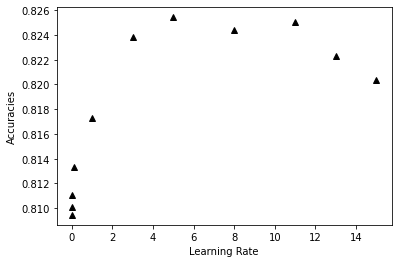

[0.8094608341810783, 0.8100712105798575, 0.811088504577823, 0.8133265513733469, 0.817293997965412, 0.8238046795523907, 0.8254323499491353, 0.8244150559511699, 0.8250254323499492, 0.8222787385554425, 0.8203458799593082]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', MultinomialNB(alpha=11))])
0.8250254323499492


In [ ]:
print("Complement Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier3)

Complement Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', ComplementNB(alpha=11))])
0.8153611393692777


In [ ]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', BernoulliNB(alpha=11))])
0.751678535096643


Stochastic Gradient methods
* Learning Rate Variants : 0.000001,0.000004,0.000006,0.000008,0.00001,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.00002,0.00003
* Best Results were given by alpha=0.00001 for TD-IDF for Tokenization

In [ ]:
#Running SDGClassifier - Linear SVM for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.000001,0.000004,0.000006,0.000008,0.00001,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.00002,0.00003]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', SGDClassifier(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

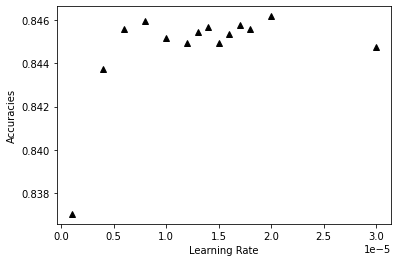

[0.837029501525941, 0.8437436419125127, 0.8455747711088505, 0.8459816887080366, 0.8451678535096643, 0.8449643947100712, 0.8454730417090539, 0.845676500508647, 0.8449643947100712, 0.8453713123092573, 0.8457782299084435, 0.8455747711088505, 0.8461851475076297, 0.8447609359104782]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("SGDClassifier SVM : - Count Vectorizer")
run_model(text_clf_classifier5)

SGDClassifier SVM : - Count Vectorizer
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1800,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', SGDClassifier(alpha=1e-05))])
0.8271617497456765


In [ ]:
print("SGDClassifier Logistic Regression : - Count Vectorizer")
run_model(text_clf_classifier6)

SGDClassifier Logistic Regression : - Count Vectorizer
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1800,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', SGDClassifier(alpha=1e-05, loss='log'))])
0.8295015259409969


In [ ]:
#text_clf_classifier7 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
text_clf_classifier8 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=0.1)),])
text_clf_classifier9 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=3000)),('clf', ComplementNB(alpha=0.1)),])
text_clf_classifier10 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=0.1)),])
text_clf_classifier11 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001)),])
text_clf_classifier12 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001,loss='log')),])

In [ ]:
#Creating sample training-test data to be passed to the GridSearch
text_counts =tfidf_vectorizer.fit_transform(df['cleaned_reviews'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['y'], test_size=0.25, random_state=5)

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train) 

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [ ]:
text_clf_classifier7 = Pipeline([('vect',tfidf_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', 
                   n_estimators=100,max_depth=80)),])
print("Random Forest Classifier - TDF-IDF Vectorizer:")
run_model(text_clf_classifier7)

Random Forest Classifier - TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', RandomForestClassifier(max_depth=80))])
0.8265513733468972


Naive Bayes methods
* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=0.1 for TDF-IDF for Tokenization

In [ ]:
#Running Multinomial Naive Bayes - TF-IDF Tokenizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.001,0.01,0.09,0.1,0.11,0.15,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', tfidf_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

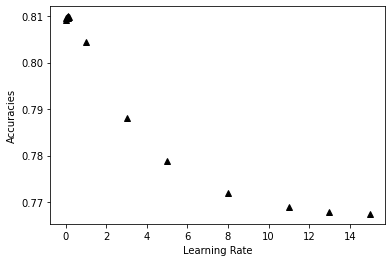

[0.8092573753814852, 0.8096642929806714, 0.8097660223804679, 0.8095625635808749, 0.8099694811800611, 0.8097660223804679, 0.8043743641912513, 0.7879959308240081, 0.7788402848423195, 0.7719226856561546, 0.7689725330620549, 0.7677517802644964, 0.7674465920651068]


In [ ]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
print("Multinomial Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier8)

Multinomial Naive Bayes - TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', MultinomialNB(alpha=0.1))])
0.8095625635808749


In [ ]:
print("Complement Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier9)

Complement Naive Bayes - TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', ComplementNB(alpha=0.1))])
0.7743641912512716


In [ ]:
print("Bernoulli Naive Bayes - TDF-IDF Vectorizer:")
run_model(text_clf_classifier10)

Bernoulli Naive Bayes - TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', BernoulliNB(alpha=0.1))])
0.7415055951169888


In [ ]:
print("SGDClassifier SVM  - TDF-IDF Vectorizer:")
run_model(text_clf_classifier11)

SGDClassifier SVM  - TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=1800,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', SGDClassifier(alpha=1e-05))])
0.8462868769074262


In [ ]:
print("SGDClassifier Logistic Regression :TDF-IDF Vectorizer:")
run_model(text_clf_classifier12)

SGDClassifier Logistic Regression :TDF-IDF Vectorizer:
Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, sublinear_tf=True)),
                ('chi',
                 SelectKBest(k=1800,
                             score_func=<function chi2 at 0x7fa34d866e60>)),
                ('clf', SGDClassifier(alpha=1e-05, loss='log'))])
0.8472024415055951


In [ ]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

# **4- BERT Model**
BERT algorithm used to develop the model. 

In [ ]:
# Test dataset URL
URL = "/content/drive/MyDrive/Umair_Client/Thesis_Twitter_Sentiment/Source_Code/coldropDS-50k_cleaned.csv"

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Installing the transformers package for BERT
!pip install transformers

     |████████████████████████████████| 3.8 MB 12.1 MB/s 
     |████████████████████████████████| 895 kB 39.6 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 6.5 MB 36.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
# Progress bar library
from tqdm.notebook import tqdm
# Tokenizer for bert
from transformers import BertTokenizer
# The dataset off which the model will be trained
from torch.utils.data import TensorDataset
# Model
from transformers import BertForSequenceClassification

# Loading the dataframe into memory
df = pd.read_csv(URL)

In [ ]:
# Checking the amount of Null values
df['cleaned_reviews'].isna().sum()

54

In [ ]:
#Dropping null values as the amount is insignificant
df=df.dropna(subset=['cleaned_reviews'])
df.shape

(49930, 6)

In [ ]:
#Displaying dataframe for clarity
df.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...


In [ ]:
#Displaying dataframe for clarity
df.tail()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
49979,49995,5.0,i had e2cs and the wires started to crack this...,Great Company and Earbuds - Can't Beat Them fo...,2,e cs wire start crack common problem shure kno...
49980,49996,5.0,works great,Five Stars,2,work great
49981,49997,4.0,i used it as an adapter for the keyboard that ...,"Which arguably makes it mostly useless, but th...",2,use adapt keyboard came logitec review k datah...
49982,49998,5.0,this is a good overall protective lens used i...,Good protective lens,2,good overal protect len use panason dmc fz car...
49983,49999,5.0,i expect tiffen filters to be good so no disa...,Perfect!,2,expect tiffen filter good disappoint need fit ...


In [ ]:
#Function that converts overall (5 classes) to y (3 classes) 
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1
    return 0

In [ ]:
# Building column y with the classify function
df['y'] = df['overall'].apply(classify)

In [ ]:
#Displaying dataframe for clarity
df

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...
...,...,...,...,...,...,...
49979,49995,5.0,i had e2cs and the wires started to crack this...,Great Company and Earbuds - Can't Beat Them fo...,2,e cs wire start crack common problem shure kno...
49980,49996,5.0,works great,Five Stars,2,work great
49981,49997,4.0,i used it as an adapter for the keyboard that ...,"Which arguably makes it mostly useless, but th...",2,use adapt keyboard came logitec review k datah...
49982,49998,5.0,this is a good overall protective lens used i...,Good protective lens,2,good overal protect len use panason dmc fz car...


In [ ]:
# Checking distribution of data
df['y'].value_counts()

2    38377
0     7830
1     3723
Name: y, dtype: int64

In [ ]:
# Creating a dictionary which contains all unique attributes in y, here these are the classes
possible_labels = df.y.unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = int(possible_label)
label_dict

{0: 0, 1: 1, 2: 2}

In [ ]:
# Changing column name from y to label for clarity
df['label'] = [label_dict[str_label] for str_label in df['y']]

In [ ]:
# a=df['label']
# b=df['y']
# a.corr(b)

In [ ]:
# Splitting the dataset into a 85-15 train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

# creating a column data_type to denote whether each record is for test or train
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.groupby(['y', 'label', 'data_type']).count()

Unnamed: 0  overall  reviewText  summary  cleaned_reviews
y label data_type                                                           
0 0     train            6655     6655        6655     6655             6655
        val              1175     1175        1175     1175             1175
1 1     train            3165     3165        3165     3165             3165
        val               558      558         558      558              558
2 2     train           32620    32620       32620    32617            32620
        val              5757     5757        5757     5757             5757

In [ ]:
# Initializing tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)              
# Encoding training batch                           
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].reviewText.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
# Encoding validation batch                           
encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].reviewText.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

# Extracting variables from encoded objects for ease of use
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

# creating tensors
labels_val = torch.tensor(df[df.data_type=='val'].label.values)
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Initializing the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Import and initialization of dataloaders and batch size hyperparameter
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
# Importing the adam optimizer and a scheduler to manage learning rate in an optimal fashion
from transformers import AdamW, get_linear_schedule_with_warmup

# Initializing the optimizer (uses the adam algorithm - an extension to stochastic gradient descent)
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
# Setting epoch hyperparameter
epochs = 3

# Scheduler to increase learning rate for a certain number of steps then linearly deacrese the same
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# Defining functions for f1 score and accuracy
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    correct=0
    total=0
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
        correct+=len(y_preds[y_preds==label])
        total+=len(y_true)
    print(f'Bert Model Accuracy Overall :',correct/total)

In [ ]:
#to check GPU vs CPU - based on whether the local/hosted runtime has an nvidia GPU available or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
import random

# Sets torchs seed to randomize to enable usage of torch.random()
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Evaluate function to be used along with tqdm to display the live progress of the model training, calculates average loss, predictions and true values.
def evaluate(dataloader_val):

    # used to turn off layers that dont perform as expected
    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
  
# Train the model
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
      
    # Write results  
    tqdm.write(f'\nEpoch {epoch}')
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')

    #Save the finetuned model per epoch
    torch.save(model.state_dict(), f'/content/drive/MyDrive/bertmodel{epoch}.model')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/14147 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.4641623975775744
Validation loss: 0.40410996839718527
F1 Score (Weighted): 0.8756016877412833


Epoch 2:   0%|          | 0/14147 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.3426644696277506
Validation loss: 0.47164230967224985
F1 Score (Weighted): 0.8827454939720577


Epoch 3:   0%|          | 0/14147 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.24731407501042316
Validation loss: 0.5703798708274147
F1 Score (Weighted): 0.8860511071416152


In [ ]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=len(label_dict),
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)
# model.to(device)
# model.load_state_dict(torch.load('/content/drive/MyDrive/bertmodel1.model', map_location=torch.device('cpu')))
# _, predictions, true_vals = evaluate(dataloader_validation)


In [ ]:
# Display final accuracy per class
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy: 970/1175

Class: 1
Accuracy: 178/558

Class: 2
Accuracy: 5513/5757

Bert Model Accuracy Overall : 0.8893190921228304
